In [1]:
using JLD, PyPlot, Statistics

In [2]:
push!(LOAD_PATH, "../CSDA/")
push!(LOAD_PATH, "../CenterOfMass/")

5-element Array{String,1}:
 "@"               
 "@v#.#"           
 "@stdlib"         
 "../CSDA/"        
 "../CenterOfMass/"

In [3]:
using LindenbergOperadores
using TrayectoriasAux

In [7]:
arx="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
esjld=true
if arx[end-2:end]!="jld"
esjld=false
end

false

In [8]:
if !esjld
    using HDF5
end

In [9]:
if esjld
    dic=jldopen(arx)
else
    dic=h5open(arx)
end
    names(dic)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [25]:
ese=findfirst(x->x[1:3]=="LFP", names(dic))
nomlfp=names(dic)[ese]

"LFPSaturados"

In [27]:
csda=read(dic["CSDALindenberg"])
lfp=read(dic[nomlfp]);
if in("freq", names(dic))
    freq=read(dic["freq"])
else
    freq=7.022 # por default en la matriz vieja, kHz
end

7.022058198545425

In [28]:
n=300
(a,b,nmax)=size(lfp)

(64, 64, 2000)

In [29]:
slfp=std(lfp)
scsd=std(csda)

25.071459f0

In [30]:
aux1=zeros(a,b,nmax)
for n=1:nmax
   # aux1[:,:,t]=GaussianSmooth(lfpplanchado[:,:,t])
    aux1[:,:,n]=GaussianSmooth(csda[:,:,n])
end

In [31]:
slfp=std(lfp)
scsd=std(csda)
scsd2=std(aux1)

11.60000261840169

In [36]:
slfp

649.8826f0

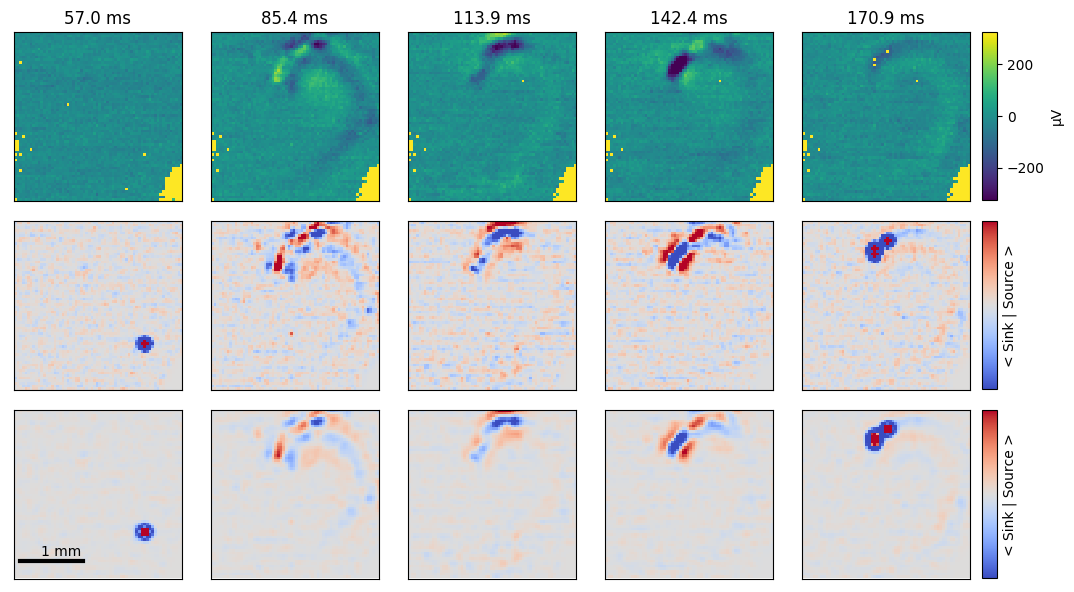

In [37]:
l=2
farofa,lista=subplots(3,5, figsize=(5*l, 3*l))
sens=5
vl=slfp/2
vc=sens*scsd/3
vc2=sens*scsd2
paso=200
figlfp=0
figcsd=0
for j=1:5
    
    n=paso*(j+1)
    t=round(n/freq, digits=1)
    
    lista[1,j].set_title("$t ms")
    figlfp=lista[1,j].imshow(lfp[:,:,n], vmin=-vl, vmax=vl, origin="lower")
    figcsd=lista[2,j].imshow(csda[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")
    lista[3,j].imshow(aux1[:,:,n], vmin=-vc2, vmax=vc2, origin="lower", cmap="coolwarm")    
    
    for k in (1,2,3)
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])
    end    
    
end



cblfpaxes = farofa.add_axes([0.99, 0.66, 0.015, 0.28]) 
cbcsd1axes = farofa.add_axes([0.99, 0.345, 0.015, 0.28])  
cbcsd2axes = farofa.add_axes([0.99, 0.03, 0.015, 0.28]) 


 cbxlfp=farofa.colorbar(figlfp, cax=cblfpaxes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
    
   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 

 cbxcsd1=farofa.colorbar(figcsd, cax=cbcsd1axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 
cbxcsd2=farofa.colorbar(figcsd, cax=cbcsd2axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 

  cbxcsd1.set_ticks([]) 
  cbxcsd2.set_ticks([]) 


   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 
  cbxcsd1.set_label("< Sink | Source >") 
  cbxcsd2.set_label("< Sink | Source >") 

  rayitax=[2,2+23+1]
  rayitay=[6,6]
  lista[3,1].plot(rayitax,rayitay, lw=3, color="black")
  lista[3,1].annotate("1 mm", xy=(10, 8) , color="black")


tight_layout()

savefig("LFPvsCSD_Faci.svg", dpi=92)
savefig("LFPvsCSD_Faci.png", dpi=92)
savefig("LFPvsCSD_Faci.pdf", dpi=92)


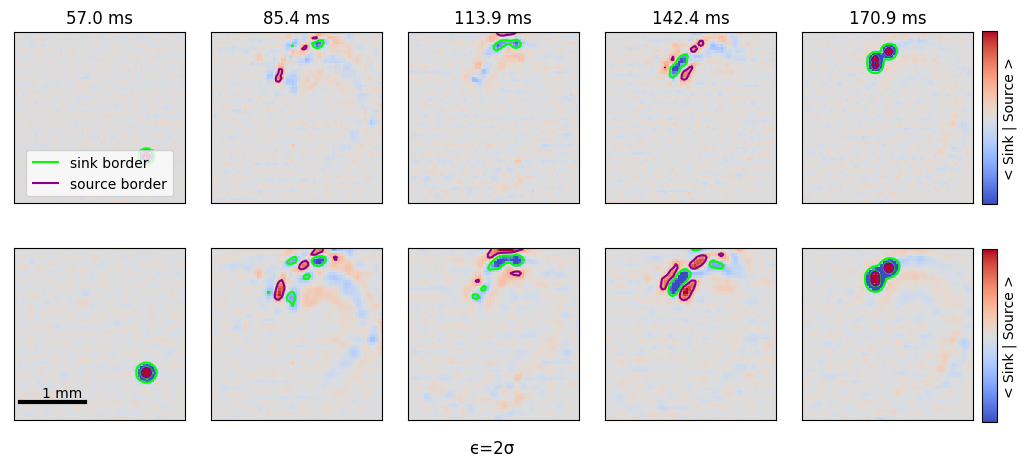

In [38]:
l=2
farofa,lista=subplots(2,5, figsize=(5*l, 2.4*l))
sens=5.0
vc=sens*scsd
vc2=sens*scsd2
paso=200
figlfp=0
figcsd=0

niveles=[-2,2]

farofa.suptitle("ϵ=2σ", y=0.05)

nivs1=collect(niveles.*scsd)
nivs2=collect(niveles.*scsd2)

fufu=0

for j=1:5
    
    n=paso*(j+1)
    t=round(n/freq, digits=1)
    
    lista[1,j].set_title("$t ms")
    figcsd=lista[1,j].imshow(csda[:,:,n], vmin=-vc, vmax=vc, origin="lower", cmap="coolwarm")
    lista[1,j].contour(csda[:,:,n], levels=nivs1, colors=["lime", "darkmagenta"])
    
    lista[2,j].imshow(aux1[:,:,n], vmin=-vc2, vmax=vc2, origin="lower", cmap="coolwarm")    
    fufu=lista[2,j].contour(aux1[:,:,n], levels=nivs2, 
        colors=["lime", "darkmagenta"])
    
    
    for k in (1,2)
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])
    end    
    
end


  rayitax=[2,2+23+1]
  rayitay=[6,6]
  lista[2,1].plot(rayitax,rayitay, lw=3, color="black")
  lista[2,1].annotate("1 mm", xy=(10, 8) , color="black")
  tuma, tupa=fufu.legend_elements()

  lista[1,1].legend(tuma, ["sink border", "source border"], loc="lower center")
    

cbcsd1axes = farofa.add_axes([0.99, 0.54, 0.015, 0.36])  
cbcsd2axes = farofa.add_axes([0.99, 0.085, 0.015, 0.36]) 

  
 cbxcsd1=farofa.colorbar(figcsd, cax=cbcsd1axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 
cbxcsd2=farofa.colorbar(figcsd, cax=cbcsd2axes,
    #ax=lista[:,4], 
    shrink=1.0, aspect=120
    #  location="right",
    )
 

  cbxcsd1.set_ticks([]) 
  cbxcsd2.set_ticks([]) 


   # cbx=colorbar(imagen, fraction=0.045) 
  cbxlfp.set_label("µV") 
  cbxcsd1.set_label("< Sink | Source >") 
  cbxcsd2.set_label("< Sink | Source >") 


tight_layout()

savefig("ComparaDisconexos2sigmasFaci.pdf", dpi=90)
savefig("ComparaDisconexos2sigmasFaci.svg", dpi=90)


In [43]:
arxcm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
arxtray="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"

In [44]:
datcm=load(arxcm)
dattr=load(arxtray)

Dict{String,Any} with 3 entries:
  "notatray"          => "longitud minima fue 3, peso minimo fue 1 "
  "CatenarioPositivo" => Dict{Integer,Array{Any,N} where N}(2=>[49.9945 17.9973…
  "CatenarioNegativo" => Dict{Integer,Array{Any,N} where N}(2=>[50.0039 18.0008…

In [45]:
cmpos=datcm["CMP"]
cmneg=datcm["CMN"];
notacm=datcm["notacm"]

"Se separaron los componentes con 1.5 desv. est. del CSD suavizado gaussiano"

In [47]:
traypos=dattr["CatenarioPositivo"]
trayneg=dattr["CatenarioNegativo"];

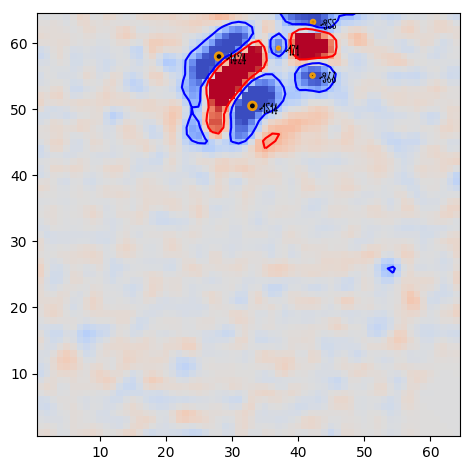

In [53]:
n=975
extt=[0.5,64.5, 0.5,64.5]


excsd=aux1[:,:,n]
imshow(excsd, cmap="coolwarm", vmin=-40,vmax=40, origin="lower", extent=extt)
xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
valorneg=cmneg[n][:,3]
scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="black", 
    edgecolors="orange", lw=2)
contour(excsd, levels=nivs2.*0.6, colors=("blue", "red"), 
    extent=extt, interpolation="none")


for j in 1:size(valorneg,1)
    annotate(round(Int,valorneg[j]),xy=(xxneg[j]+1,yyneg[j]-1), fontname="Punk Nova", fontproperties="Bold")
end


tight_layout()
#savefig("EjemploFronteraComponentesDisjuntos01.svg")

In [54]:
#n=575

#for n=1:nmax

extt=[0.5,64.5, 0.5,64.5]
f=figure(figsize=(3,3))

excsd=aux1[:,:,n]
imshow(excsd, cmap="coolwarm", vmin=-80,vmax=80, origin="lower", extent=extt)
contour(excsd, levels=nivs2, colors=("blue", "red"), 
    extent=extt, interpolation="none", zorder=1, origin="lower")



xxneg=cmneg[n][:,1]
yyneg=cmneg[n][:,2]
valorneg=cmneg[n][:,3]

scatter(xxneg, yyneg,s=0.02*abs.(valorneg), alpha=0.9, c="lightsteelblue", 
    edgecolors="midnightblue", lw=2, zorder=3)

for j in 1:size(valorneg,1)
    annotate(round(Int,valorneg[j]),xy=(xxneg[j]+1,yyneg[j]-1), 
        color="navy", zorder=4, fontname="Missaali", fontproperties="Bold")
end


xxpos=cmpos[n][:,1]
yypos=cmpos[n][:,2]
valorpos=cmpos[n][:,3]

scatter(xxpos, yypos,s=0.02*abs.(valorpos), alpha=0.9, c="coral", 
    edgecolors="maroon", lw=2, zorder=5)


for j in 1:size(valorpos,1)
    annotate(round(Int,valorpos[j]),xy=(xxpos[j]+1,yypos[j]-1),
        color="darkred", zorder=6, fontname="Punk Nova", fontproperties="Bold")
end

xticks([])
yticks([])

#tight_layout()
    
     nstring=lpad(n, 8, "0")
    
savefig("tuablea_$nstring.png", dpi=90)
close()
    
#end

In [62]:
function dibujasubtray(trayneg,hasta=nmax, desde=0; color="yellow", vlabel=false, 
        persiste=false, ejes=0, pts=12,  liwid=0.25) 
    
for (k,p) in trayneg
            
            paux=AntesQue(p,hasta+1)
            paux=DespuesQue(paux,desde)
            cucho,fleto=size(paux)
            longus,falsus=size(p)
        if  cucho>0  && ((hasta-14< paux[end, 4]) || persiste) #persistencia por un ratito o eterna
                #Si son chiquitos no nos interesan.
                xxpos=paux[:,1]
                yypos=paux[:,2]    
                gordis=abs.(map(Float32, paux[:,3]))
                tiempos= round.((paux[:,4])/freq,digits=1)
                if ejes == 0 
                plot(xxpos, yypos, marker="o", markersize=pts, color=color, lw=liwid,zorder=1798)   
                else 
                ejes.plot(xxpos, yypos, marker="o", markersize=pts, 
                    color=color, lw=liwid,zorder=1798)   
                end
                #=    
                scatter(xxpos[end],yypos[end],marker="o", s=0.06*gordis, color="blue",alpha=0.3)
                    inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
                linewidth=1,
                facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )        
                =#   
                
                if ejes==0
                finales=scatter(xxpos[end],yypos[end], s=2*pts, edgecolors="black", 
                linewidth=2*liwid,
                facecolor=color, marker="o", label="Final" ,zorder=1200)
                else
                finales=ejes.scatter(xxpos[end],yypos[end], s=2*pts, edgecolors="black", 
                linewidth=2*liwid,
                facecolor=color, marker="o", label="Final" ,zorder=1200)
                end
                    
            if(vlabel) && length(xxpos)>1
                dist=sqrt((xxpos[end]-xxpos[end-1])^2+(yypos[end]-yypos[end-1])^2)
                vel=round(dist*freq,digits=1)
                if ejes==0
                    annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color=color, zorder=1950)
                else
                    ejes.annotate(vel, (xxpos[end], yypos[end]), 
                        fontsize=10, color=color, zorder=1950)
                
                end     
             end
                end #sobre cucho
            end #sobre cmnegred
    
    end #function

dibujasubtray (generic function with 3 methods)

In [63]:

function ploteaanimacioncompleta(fondo, facnivs=2, 
        inicio=1000, fin=1500;
        traypos=traypos, trayneg=trayneg, pts=12, persiste=false)

    tiemposinteresantes=inicio:fin
    sfondo=std(fondo)
    limcsd=5*sfondo
    println("limcsd=", limcsd)
    vepsi=[-facnivs,facnivs].*sfondo
  #  cepsi=("teal","tomato")
    distie=42 #Distancia inter electrodo
    
    for n in tiemposinteresantes
  
        
        ImagenCSD=fondo[:,:,n];
        figure(figsize=(6,6))
        axis("equal")
        milisec=round((n)/freq,digits=1)
        title("t= $milisec ms")
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=10)
        yticks(fontsize=10)
        xlim(0.5,64.5)
        ylim(0.5,64.5)
      
    
    
        guacafondo=imshow(ImagenCSD, cmap="coolwarm", interpolation="nearest", 
        vmin=-limcsd, vmax=limcsd, extent=extt, origin="lower")
        contour(ImagenCSD, vepsi, colors=("cyan", "magenta"), lw=0.4, extent=extt,
            origin="lower")
            
        #here is the carnita boyo
         dibujasubtray(traypos,n, 1, color="maroon", persiste=persiste,pts=pts)
         dibujasubtray(trayneg,n, 1, color="darkblue", persiste=persiste,pts=pts)
        
        nstring=lpad(n, 5, "0")
        
        if mod(n-inicio,100)==1
            print("va $nstring \t")
        end
        savefig("CSDyTray-novelo-$nstring.png",dpi=92)    
      close()
        
    end #sobre tiempos interesantes
    
    println("listo") 
end  #sobre function

ploteaanimacioncompleta (generic function with 7 methods)

In [65]:
ploteaanimacioncompleta(aux1, 2, 
        300,1200, 
        traypos=traypos, trayneg=trayneg, persiste=false,pts=5)


limcsd=58.00001309200845
va 00301 	va 00401 	va 00501 	va 00601 	va 00701 	va 00801 	va 00901 	va 01001 	va 01101 	listo


In [21]:
extt
nmax

1402

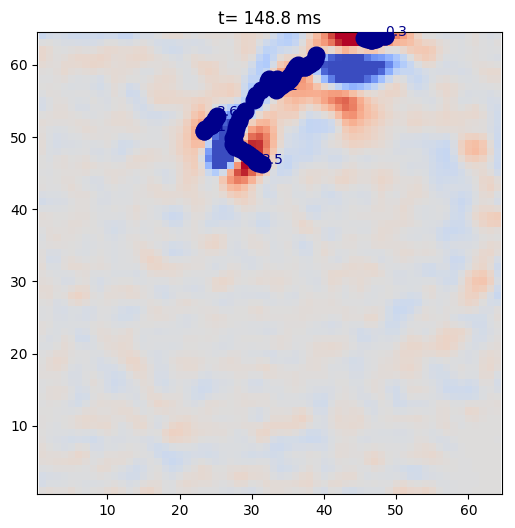

In [59]:
nex=1045

limcsd=5*std(aux1)

ImagenCSD=aux1[:,:,nex];
        figure(figsize=(6,6))
        axis("equal")
        milisec=round((nex)/freq,digits=1)
        title("t= $milisec ms")
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=10)
        yticks(fontsize=10)
        xlim(0.5,64.5)
        ylim(0.5,64.5)

        guacafondo=imshow(ImagenCSD, cmap="coolwarm", interpolation="nearest", 
        vmin=-limcsd, vmax=limcsd, extent=extt, origin="lower")
    dibujasubtray(trayneg, 1022, 1, color="darkblue", vlabel=true)

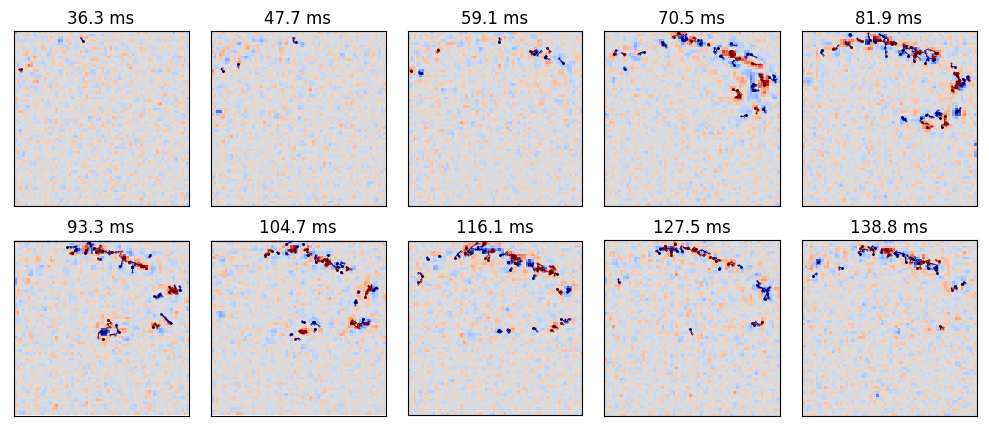

In [23]:
l=2
farofa,lista=subplots(2,5, figsize=(5*l, 2.2*l))
sens=7.0
vc=sens*scsd
vc2=sens*scsd2
paso=80
figlfp=0
figcsd=0

niveles=[-2,2]

#farofa.suptitle("ϵ=2σ", y=0.05)

nivs1=niveles.*scsd
nivs2=niveles.*scsd2

for j=0:9
    
     n=paso*(j+1)+175
    (k,l)=(div(j,5)+1, mod(j,5)+1)
    t=round(n/freq, digits=1)
 
    
    lista[k,l].set_xlim(0.5,64.5)
    lista[k,l].set_ylim(0.5,64.5)
   # print(k, " ", l,  " t ")
    lista[k,l].set_title("$t ms")
    lista[k,l].set_xticks([])
    lista[k,l].set_yticks([])

    csdaex=aux1[:,:,n]
    lista[k,l].imshow(csdaex, extent=extt, origin="lower", cmap="coolwarm", vmin=-vc2, vmax=vc2)
  
      dibujasubtray(trayneg,n, 1, color="darkblue", ejes=lista[k,l], 
        persiste=false, pts=0.350, liwid=0.6)
  
    dibujasubtray(traypos,n, 1, color="maroon", ejes=lista[k,l], 
        persiste=false, pts=0.35, liwid=0.6)
     
        # dibujasubtray(trayneg,n, 1, color="darkblue")
    
end

tight_layout()

savefig("SeqTray4AP01.pdf", dpi=90)
savefig("SeqTray4AP01.png", dpi=90)
savefig("SeqTray4AP01.svg", dpi=90)


In [24]:
gordprompos=[]
longproms=[]
for k  in values(trayneg)
    push!(longproms, size(k)[1])
    push!(gordprompos, round(mean(k[:,3]), digits=1))
end

In [25]:
gorduras=(1, 120, 200, 300, 1000)
longitudes=(3, 5, 10, 17, 25)

trayfiltpos=Dict{Tuple{Int, Int}, Dict{Integer, Array}}()
trayfiltneg=Dict{Tuple{Int, Int}, Dict{Integer, Array}}()


Dict{Tuple{Int64,Int64},Dict{Integer,Array}} with 0 entries

In [26]:
for g in gorduras, l in longitudes
    trayfiltneg[(g,l)]=reducecatenario(trayneg, gordmin=g, minlong=l, maxlong=100, distmin=0)
    trayfiltpos[(g,l)]=reducecatenario(traypos, gordmin=g, minlong=l)
end

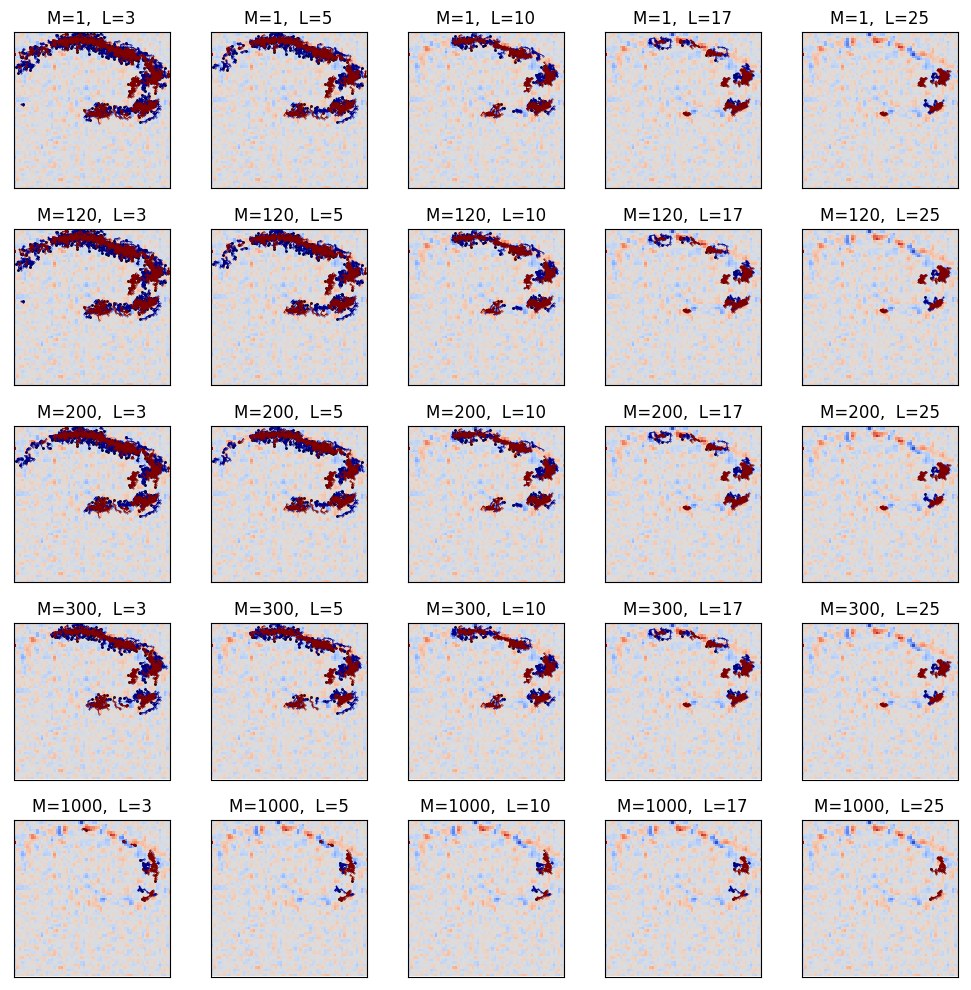

In [34]:
l=2
farofa,lista=subplots(5,5, figsize=(5*l, 5*l))
sens=7.0
vc=sens*scsd
vc2=sens*scsd2
paso=80
figlfp=0
figcsd=0

 n=800
   

#farofa.suptitle("ϵ=2σ", y=0.05)
for j in 1:5, k in 1:5

    g=gorduras[k]
    l=longitudes[j]
    
    
    
    lista[k,j].set_xlim(0.5,64.5)
    lista[k,j].set_ylim(0.5,64.5)
   # print(k, " ", l,  " t ")
    lista[k,j].set_title("M=$g,  L=$l")
    lista[k,j].set_xticks([])
    lista[k,j].set_yticks([])

    csdaex=aux1[:,:,n]
    lista[k,j].imshow(csdaex, extent=extt, origin="lower", cmap="coolwarm", vmin=-vc2, vmax=vc2)
  
    trneg=trayfiltneg[(g,l)]
    trpos=trayfiltpos[(g,l)]
 
    
    dibujasubtray(trneg,n, 1, color="darkblue", ejes=lista[k,j], 
        persiste=true, pts=0.350, liwid=0.6) 
    dibujasubtray(trpos,n, 1, color="maroon", ejes=lista[k,j], 
        persiste=true, pts=0.35, liwid=0.6)
     
        # dibujasubtray(trayneg,n, 1, color="darkblue")
    
end

tight_layout()

savefig("comparatrayectorias01.pdf", dpi=90)

In [28]:
mean(gordprompos), std(gordprompos)

(-285.4111627906977, 185.31102160888602)

In [ ]:
extrema(gordprompos)

In [ ]:
extrema(longproms)

In [ ]:
hist(longproms, bins=50)

In [ ]:
hist(gordprompos, bins=50)

In [ ]:
tposaux=reducecatenario(traypos, 200, 7, 100, 0)

In [ ]:
TrayectoriasAux.reducecatenario

In [ ]:
AntesQue

In [ ]:
reducecatenario